In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

stock = pdr.get_data_yahoo('TSLA', start='2011-07-01', end = '2020-12-28')

[*********************100%%**********************]  1 of 1 completed


In [2]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-01,1.938000,1.973333,1.920000,1.934667,1.934667,12823500
2011-07-05,1.934667,1.968000,1.914000,1.942667,1.942667,14940000
2011-07-06,1.942667,1.942667,1.903333,1.930667,1.930667,13903500
2011-07-07,1.942667,2.000000,1.934000,1.982000,1.982000,19918500
2011-07-08,1.992667,1.992667,1.906000,1.920667,1.920667,18609000


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2388 entries, 2011-07-01 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2388 non-null   float64
 1   High       2388 non-null   float64
 2   Low        2388 non-null   float64
 3   Close      2388 non-null   float64
 4   Adj Close  2388 non-null   float64
 5   Volume     2388 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 130.6 KB


In [4]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2.388000e+03
mean,21.895220,22.383843,21.386233,21.926645,21.926645,1.029826e+08
std,30.929988,31.793421,30.005519,31.068869,31.068869,8.852235e+07
min,1.462000,1.540667,1.433333,1.463333,1.463333,3.594000e+06
25%,10.830000,11.083500,10.537500,10.832833,10.832833,4.653900e+07
50%,15.380667,15.651667,15.139333,15.372666,15.372666,8.165475e+07
75%,20.854499,21.131499,20.425833,20.816999,20.816999,1.296109e+08
max,222.966660,231.666672,215.356674,231.666672,231.666672,9.140820e+08


In [5]:
stock.to_csv('teslakidetail.csv')

In [6]:
%matplotlib inline

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

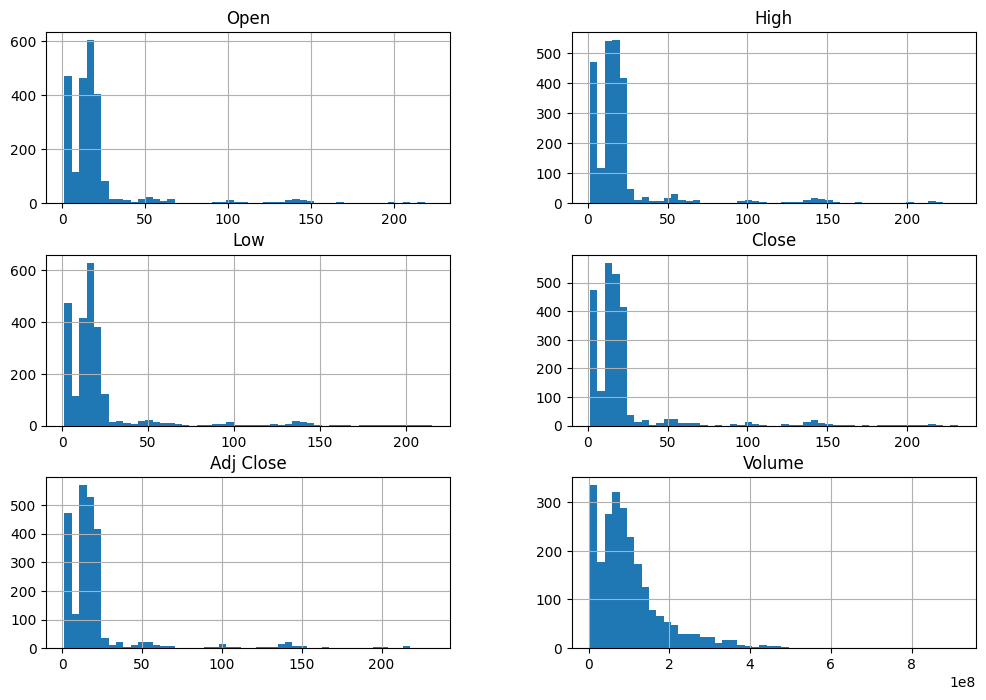

In [7]:
import matplotlib as plt
stock.hist(bins=50, figsize=(12,8))

## Train Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stock, test_size=0.2, random_state=42)
print(f"Rows in train: {len(train_set)}\nRows in test : {len(test_set)}")

Rows in train: 1910
Rows in test : 478


In [9]:
stock = train_set.copy()

## Looking for correlation

In [10]:
corr_matrix = stock.corr()
corr_matrix['Close'].sort_values(ascending=False)

Close        1.000000
Adj Close    1.000000
High         0.999597
Low          0.999459
Open         0.998970
Volume       0.350390
Name: Close, dtype: float64

array([[<Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>],
       [<Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>]], dtype=object)

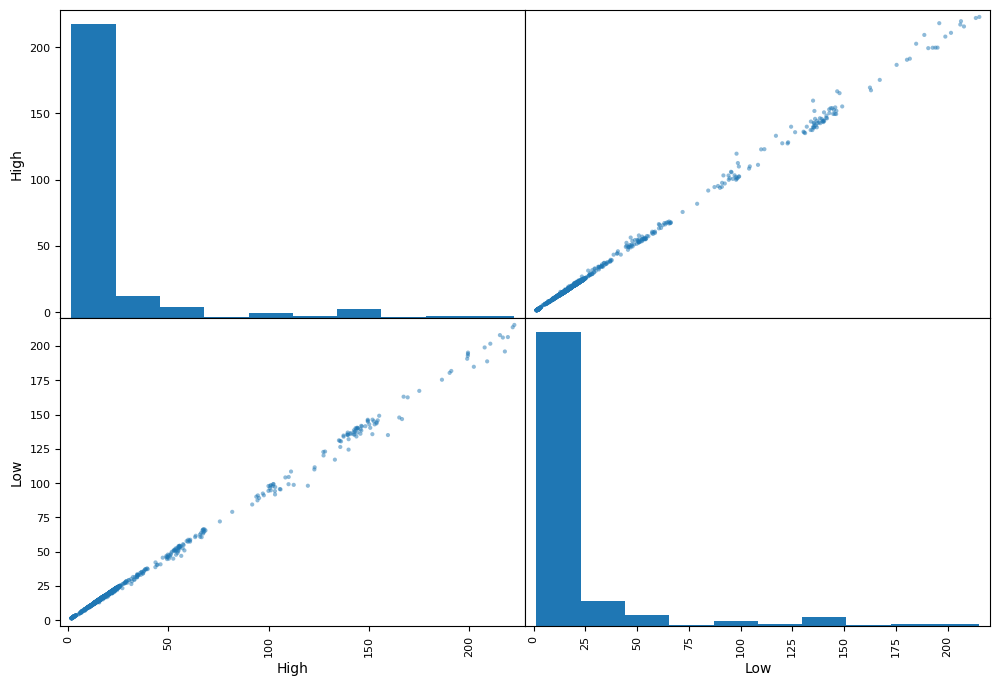

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["High", "Low"]
scatter_matrix(stock[attributes], figsize=(12, 8))

## Trying out attributes

In [12]:
stock['OpenHigh']=stock['Open']/stock['High']

In [13]:
corr_matrix = stock.corr()
corr_matrix['Close'].sort_values(ascending=False)

Close        1.000000
Adj Close    1.000000
High         0.999597
Low          0.999459
Open         0.998970
Volume       0.350390
OpenHigh    -0.105706
Name: Close, dtype: float64

In [14]:
stock = train_set.drop('Close', axis=1)
stock_labels = train_set['Close'].copy()

## Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
my_pipeline = Pipeline([
    ('stdscaler', StandardScaler())
])

In [17]:
stock.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2015-06-03,16.546667,16.714666,16.467333,16.599333,26722500
2015-08-11,15.810000,15.953333,15.629333,15.824667,63973500
2012-08-03,1.793333,1.836667,1.782667,1.818000,18142500
2014-08-12,17.205334,17.353333,16.972000,17.330667,95734500
2014-03-13,16.252666,16.279333,15.600000,15.852667,93544500


In [18]:
stock_num_tr = my_pipeline.fit_transform(stock)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(stock_num_tr, stock_labels)

RandomForestRegressor()

In [20]:
some_data = stock.iloc[:5]
some_labels = stock_labels.iloc[:5]

In [21]:
some_data

,Open,High,Low,Adj Close,Volume
Date,,,,,
2015-06-03,16.546667,16.714666,16.467333,16.599333,26722500
2015-08-11,15.810000,15.953333,15.629333,15.824667,63973500
2012-08-03,1.793333,1.836667,1.782667,1.818000,18142500
2014-08-12,17.205334,17.353333,16.972000,17.330667,95734500
2014-03-13,16.252666,16.279333,15.600000,15.852667,93544500


In [22]:
prepared_data = my_pipeline.transform(some_data)

In [23]:
model.predict(prepared_data)

array([16.59905954, 15.81852027,  1.81713335, 17.33042717, 15.85092671])

## Evaluating

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, stock_num_tr, stock_labels, scoring='neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [25]:
def print_scores(scores):
    print('scores: ', scores)
    print('mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

print_scores(rmse_scores)

scores:  [0.28281478 0.37720133 0.5370665  0.79367051 0.35290922 0.67143977
 0.69006735 0.36768797 0.76301101 0.44794651]
mean:  0.5283814952784353
Standard deviation:  0.17842473296773095


## Saving the Model

In [26]:
from joblib import dump, load
dump(model, "stock.joblib")

['stock.joblib']

## Testing the Model

In [27]:
from sklearn.metrics import mean_squared_error
x_test = test_set.drop("Close", axis=1)
y_test = test_set['Close'].copy()
x_test_prepared_data = my_pipeline.transform(x_test)
final = model.predict(x_test_prepared_data)
final_mse = mean_squared_error(y_test, final)
final_rmse = np.sqrt(final_mse)

In [28]:
prepared_data

array([[-0.1785932 , -0.18391187, -0.16974192, -0.17723965, -0.88073604],
       [-0.20243262, -0.20788925, -0.19765284, -0.20221036, -0.44951663],
       [-0.65602882, -0.65247852, -0.6588379 , -0.65370368, -0.98005855],
       [-0.15727796, -0.16379776, -0.15293318, -0.15366568, -0.08184973],
       [-0.18810741, -0.19762222, -0.1986298 , -0.20130781, -0.10720128]])

## Using the model

In [29]:
features = np.array([[-0.1785932 , -0.18391187, -0.16974192, -0.17723965, -0.88073604]])
model.predict(features)

array([16.59905954])